In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
data1 = pd.read_csv('data/Plot Values linha dnapk aline.csv')


In [3]:
data1.head()

,Distance_(microns),gh2ax,dnapk,fak
0,0.000000,997.375,903.625,973.625
1,0.032242,1725.336,900.424,1740.342
2,0.064484,3161.016,896.289,2554.891
3,0.096726,5202.762,933.256,2940.793
4,0.128968,6831.125,963.625,2690.688


In [4]:
fak_plot =  data1['fak']
gammah2ax_plot =  data1['gh2ax']
ku80_plot =  data1['dnapk']
distance_microns = data1['Distance_(microns)']

fak_plot_normalized = fak_plot/max(fak_plot)
ku80_plot_normalized = ku80_plot/max(ku80_plot)
gammah2ax_plot_normalized = gammah2ax_plot/max(gammah2ax_plot)

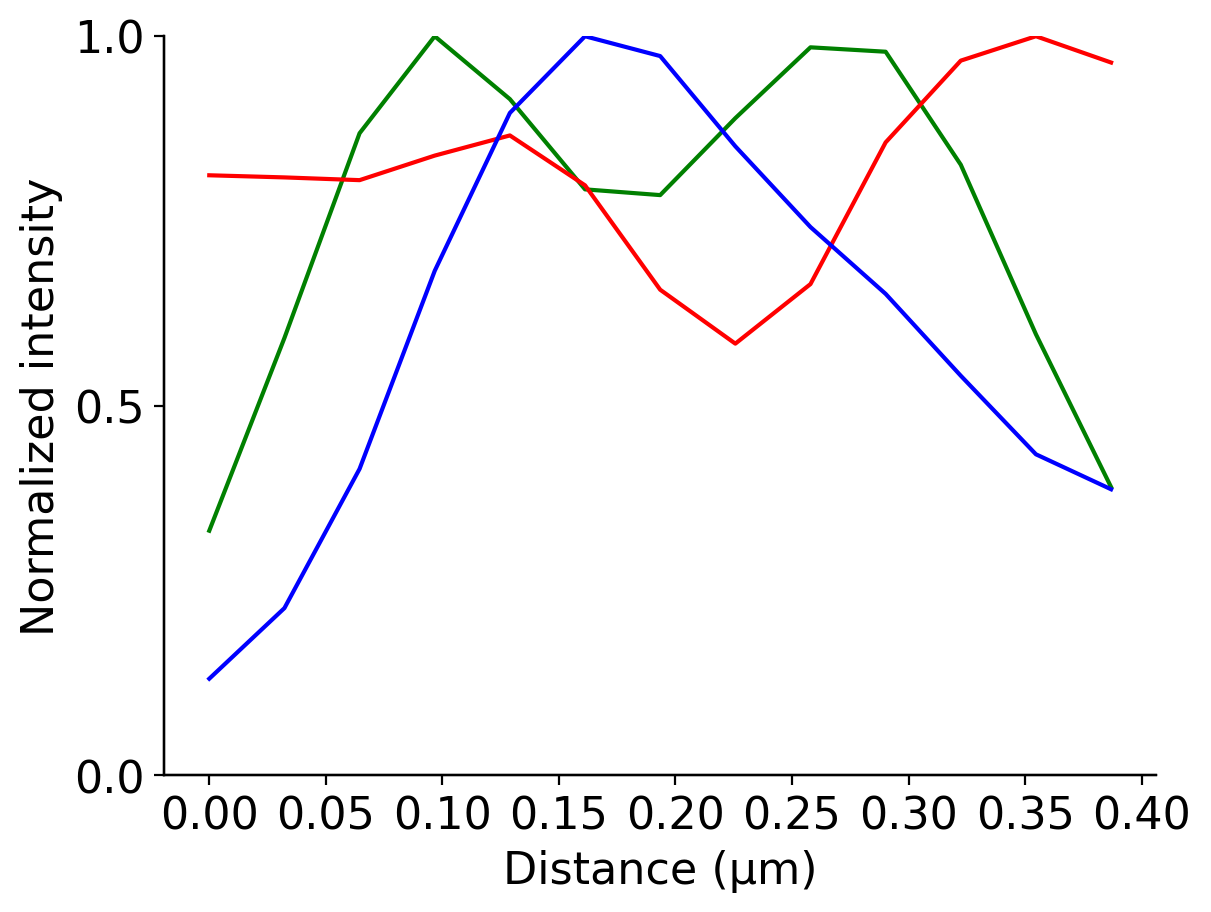

In [5]:

Nome_imagem_pdf = 'plot_fak-dnapk-h2ax_loci-gammah2ax_withxy_norm_aline.pdf'
Nome_imagem_jpeg = 'plot_fak-dnapk-h2ax_loci-gammah2ax_withxy_norm_aline.jpeg'
# Sequences
x_axes = distance_microns
line1 = fak_plot_normalized
line2 = ku80_plot_normalized
line3 = gammah2ax_plot_normalized

# infor para mudar fácil

Tamanho_ticks_Y = 16
Tamanho_label_Y = 16
Eixo_Y = "Normalized intensity"
Eixo_X = "Distance (µm)"

fig, ax = plt.subplots(dpi=200)

# Plot linear sequence, and set tick labels to the same color
ax.plot(x_axes, line1, color='green')
plt.ylim(0,1)
#parametros do eixo y
ax.tick_params(axis='y', labelcolor='black')
plt.yticks((0.0,0.5,1.0),fontsize=Tamanho_ticks_Y)
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)

#parametros do eixo y
plt.xticks(fontsize=Tamanho_ticks_Y)
ax.set_xlabel(Eixo_X,fontsize=Tamanho_label_Y)


# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(x_axes, line2, color='red')
plt.ylim(0,1)

# Generate a new Axes instance, on the twin-X axes (same position)
ax3 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax3.plot(x_axes, line3, color='blue')
plt.ylim(0,1)


# Hide the y axes
#ax.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)

# Hide the right and top spines
sns.despine()

# Hide the x axes
#ax.axes.xaxis.set_visible(False)

plt.savefig(Nome_imagem_pdf,bbox_inches='tight')
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')
plt.show()

# fazendo fill


In [6]:
df = data1.copy()
df['dnapk'] = df['dnapk']/df['dnapk'].max()
df['fak'] = df['fak']/df['fak'].max()
df['gh2ax'] = df['gh2ax']/df['gh2ax'].max()
df['3ch_coloc'] = df[['gh2ax', 'fak', 'dnapk']].min(axis=1)

In [7]:
df

,Distance_(microns),gh2ax,dnapk,fak,3ch_coloc
0,0.000000,0.130859,0.811912,0.331076,0.130859
1,0.032242,0.226371,0.809036,0.591793,0.226371
2,0.064484,0.414737,0.805321,0.868776,0.414737
3,0.096726,0.682622,0.838536,1.000000,0.682622
4,0.128968,0.896270,0.865823,0.914953,0.865823
5,0.161210,1.000000,0.798313,0.792866,0.792866
6,0.193452,0.973183,0.657124,0.785088,0.657124
7,0.225694,0.851107,0.584130,0.889182,0.584130
8,0.257937,0.741884,0.664725,0.985002,0.664725
9,0.290179,0.651464,0.856420,0.979053,0.651464


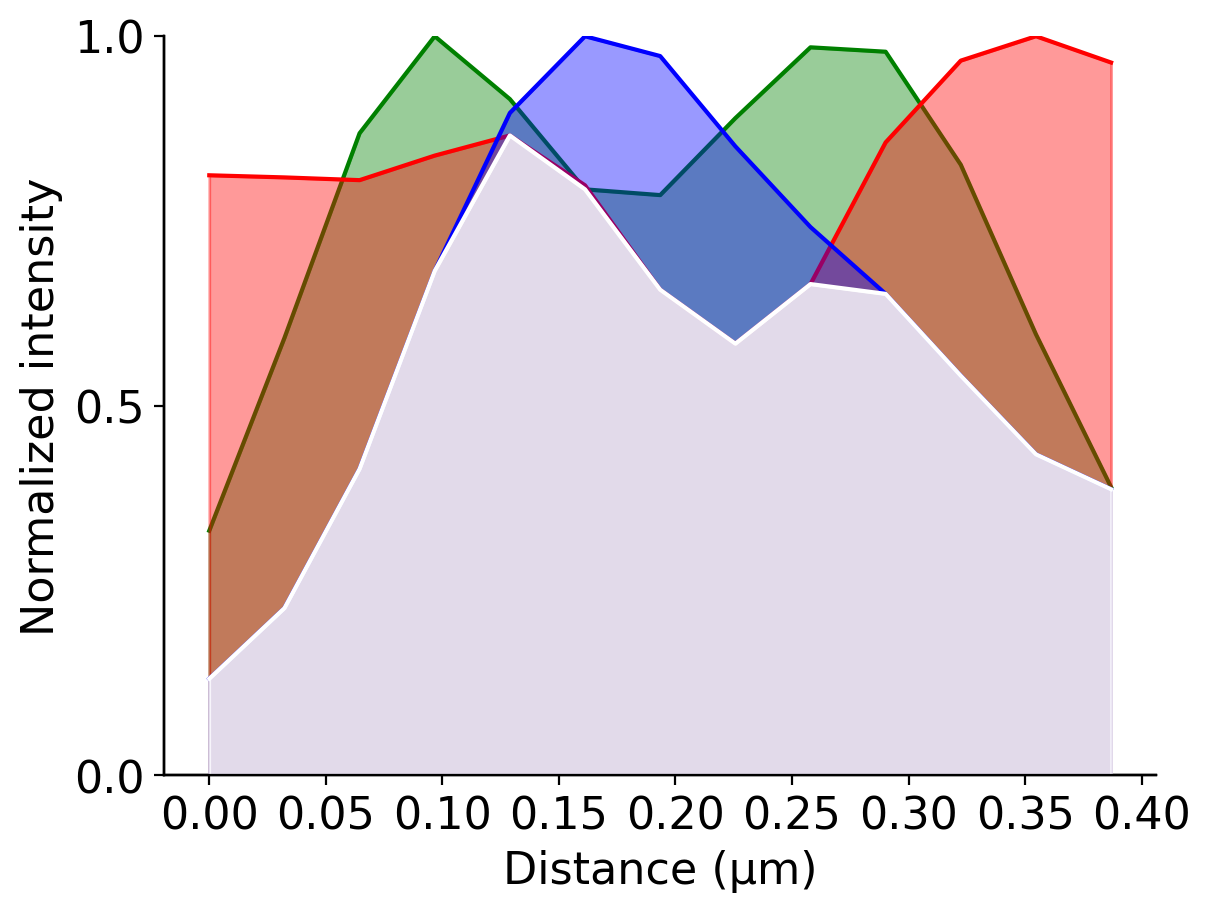

In [8]:

Nome_imagem_pdf = 'plot_fak-dnapk-h2ax_loci-gammah2ax_withxy_norm_29jul23_fill.pdf'
Nome_imagem_jpeg = 'plot_fak-dnapk-h2ax_loci-gammah2ax_withxy_norm_29jul23_fill.jpeg'
# Sequences
x_axes = distance_microns
line1 = df['fak']
line2 = df['dnapk']
line3 = df['gh2ax']
line4 = df['3ch_coloc']

# infor para mudar fácil

Tamanho_ticks_Y = 16
Tamanho_label_Y = 16
Eixo_Y = "Normalized intensity"
Eixo_X = "Distance (µm)"

fig, ax = plt.subplots(dpi=200)

# Plot linear sequence, and set tick labels to the same color
ax.plot(x_axes, line1, color='green')
plt.ylim(0,1)
plt.fill_between(x_axes, line1, color='green', alpha=0.4, label='Área de preenchimento')

#parametros do eixo y
ax.tick_params(axis='y', labelcolor='black')
plt.yticks((0.0,0.5,1.0),fontsize=Tamanho_ticks_Y)

ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)

#parametros do eixo y
plt.xticks(fontsize=Tamanho_ticks_Y)
ax.set_xlabel(Eixo_X,fontsize=Tamanho_label_Y)

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(x_axes, line2, color='red')
plt.ylim(0,1)
plt.fill_between(x_axes, line2, color='red', alpha=0.4, label='Área de preenchimento')

# Generate a new Axes instance, on the twin-X axes (same position)
ax3 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax3.plot(x_axes, line3, color='blue')
plt.ylim(0,1)
plt.fill_between(x_axes, line3, color='blue', alpha=0.4, label='Área de preenchimento')


ax4 = ax.twinx()
ax4.plot(x_axes, line4, color='white')
plt.fill_between(x_axes, line4, color='white', alpha=.8, label='Área de preenchimento')
plt.ylim(0,1)

# Hide the y axes
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)

# Hide the right and top spines
sns.despine()

plt.savefig(Nome_imagem_pdf,bbox_inches='tight')
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')
plt.show()

In [9]:
from numpy import trapz

def area_under_graph(data, spacement):
    area = trapz(data, dx=spacement)
    return area

print ('area coloc 3ch:', area_under_graph(df['3ch_coloc'], 0.032242))
print ('area fak:', area_under_graph(df['fak'], 0.032242))
print ('area dnapk:', area_under_graph(df['dnapk'], 0.032242))
print ('area gh2ax:', area_under_graph(df['gh2ax'], 0.032242))

area coloc 3ch: 0.21840777122445068
area fak: 0.309208916497693
area dnapk: 0.31386286655123863
area gh2ax: 0.24735383065417307
